In [1]:
import numpy as np
from dgamod import *
import cmath as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
import configparser
import sys
import os

mpl.rcParams.update({'font.size': 14})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

In [2]:
def state_fidelity(state):
    nh = np.shape(state)[0]
    fid = np.real(state[nh-1]*np.conjugate(state[nh-1]))
    return fid


In [3]:
def compare_evolutions(directory,n,samples):

    samples = list(samples)
    
    axs = plt.figure(figsize=(11,5)) # generate figure

    files = os.listdir(directory)
    for file in files:
        if 'n' and '.ini' in file:
            initfile = directory + '/'+file
            config = configparser.ConfigParser()
            config.read(initfile)
            print(initfile)

    # system parameters
    nh = config.getint("system_parameters", "n")
    dt = config.getfloat("system_parameters", "dt")
    b = config.getfloat("system_parameters", "b")
    t_steps = config.getint("ga_initialization", "num_genes")+1

    # generar propagadores
    actions = actions_paper(b, nh)
    propagators = gen_props(actions, nh, b, dt)
    times = np.arange(0,t_steps,1)

    # definicion del estado inicial e inicializacion de estados forzado y natural

    initial_state = np.zeros(nh, dtype=np.complex_)
    initial_state[0] = 1.0

    free_state = initial_state

    for sample in samples:

        # acceder a la solucion
        solution_file = directory + "/act_sequence_n{}_sample{}.dat".format(nh,sample)
        action_sequence = np.genfromtxt(solution_file, dtype=int)

        # inicializacion de estado forzado 
        forced_state = initial_state
    
        # almacenar evolucion natural y evolucion forzada
        forced_evol = [state_fidelity(forced_state)]

        for action in action_sequence:
            
            forced_state = calculate_next_state(forced_state,action,propagators)
            forced_evol.append(state_fidelity(forced_state))

        max_forced = np.max(forced_evol)

        plt.plot(times,forced_evol,'-o', label = 'Forced Evolution. Sample {} , Máx.: {}'.format(sample,max_forced))
    
    natural_evol = [state_fidelity(free_state)]
    
    for action in action_sequence:
            
        free_state = calculate_next_state(free_state,0,propagators)
        natural_evol.append(state_fidelity(free_state))

    max_natural = np.max(natural_evol)

    plt.plot(times,natural_evol, '-v', label = 'Natural Evolution , Máx: {}'.format(max_natural))
    plt.legend(loc='upper left')

    plt.title(' Probabilidad de transmisión ')

# Comparación de evolución natural y evolución con forzamientos.

## N = 12

/home/speron/dynga/dinamic_ga/n12_si/gan12_si.ini
Propagacion de autoestados: correcta


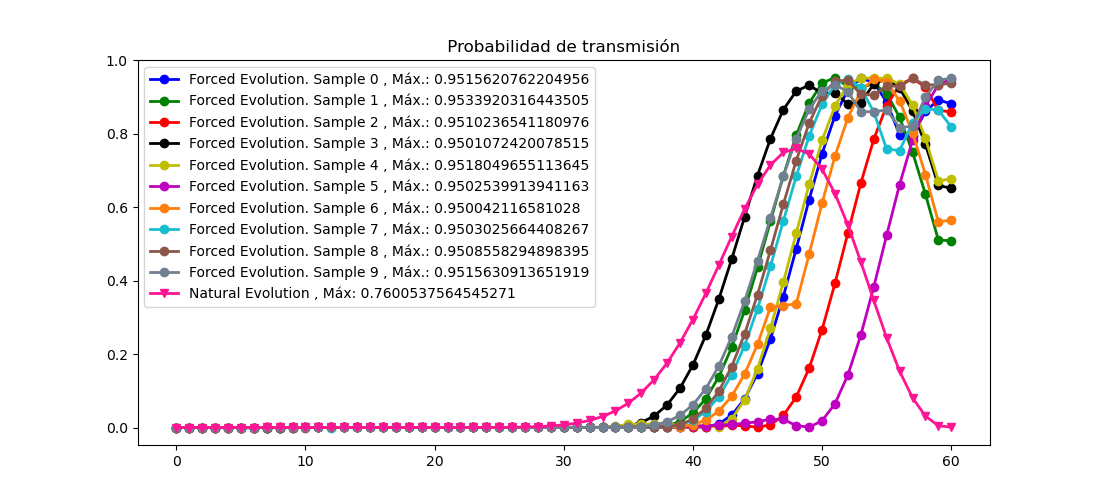

In [4]:
directory = '/home/speron/dynga/dinamic_ga/n12_si'
n = 12
samples = np.arange(0,10,1)
compare_evolutions(directory,n,samples)

## N = 13

/home/speron/dynga/dinamic_ga/n13_si/gan13_si.ini
Propagacion de autoestados: correcta


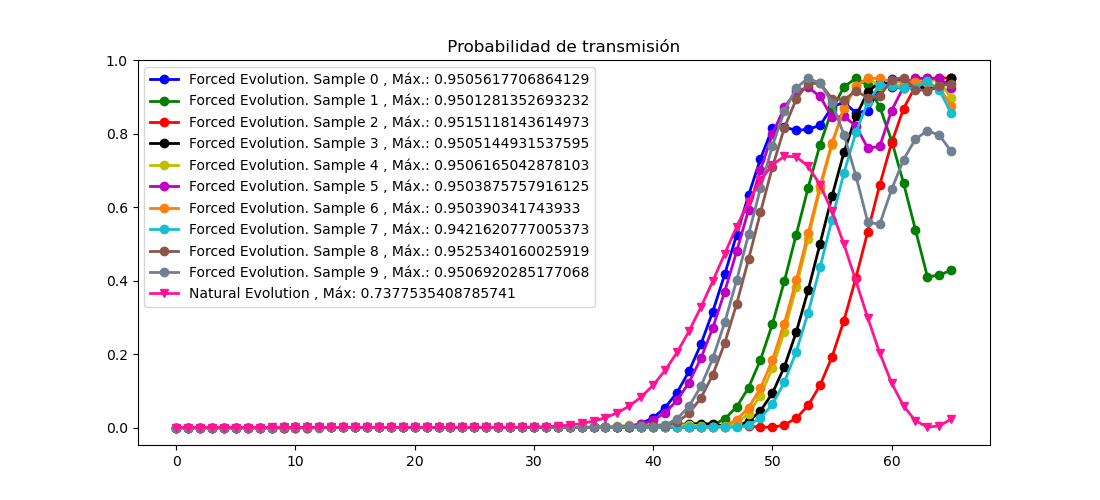

In [5]:
directory = '/home/speron/dynga/dinamic_ga/n13_si'
n = 13
samples = np.arange(0,10,1)
compare_evolutions(directory,n,samples)

## N = 15

/home/speron/dynga/dinamic_ga/n15_si_2/gan15_si_2.ini
Propagacion de autoestados: correcta


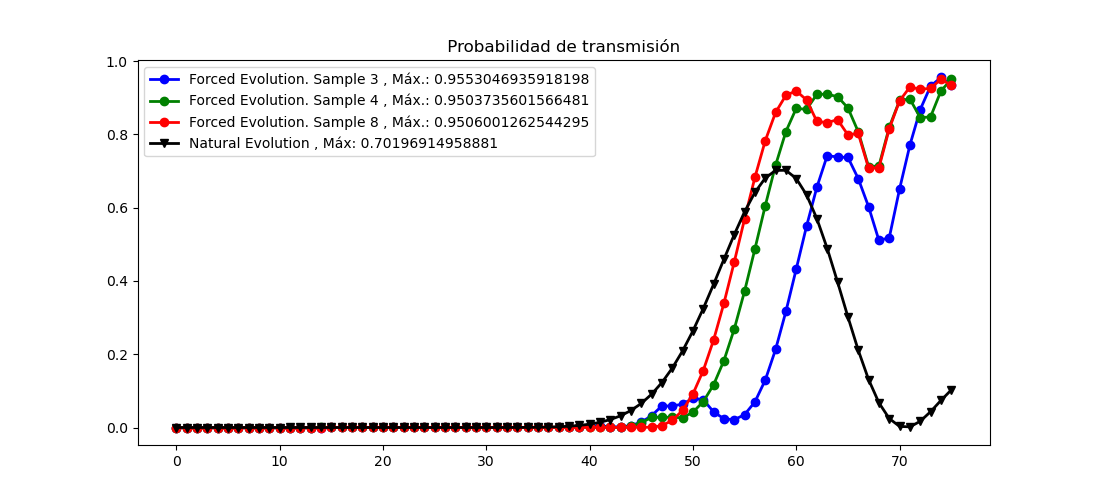

In [6]:
directory = '/home/speron/dynga/dinamic_ga/n15_si_2'
n = 15
samples = [3,4,8] #np.arange(0,10,1)
compare_evolutions(directory,n,samples)